In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom k-means implementation.
from kmeans import KMeans

In [10]:
iris_data = pd.read_csv('iris.csv')

iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
5,5.4,3.9,1.7,0.4,SETOSA
6,4.6,3.4,1.4,0.3,SETOSA
7,5.0,3.4,1.5,0.2,SETOSA
8,4.4,2.9,1.4,0.2,SETOSA
9,4.9,3.1,1.5,0.1,SETOSA


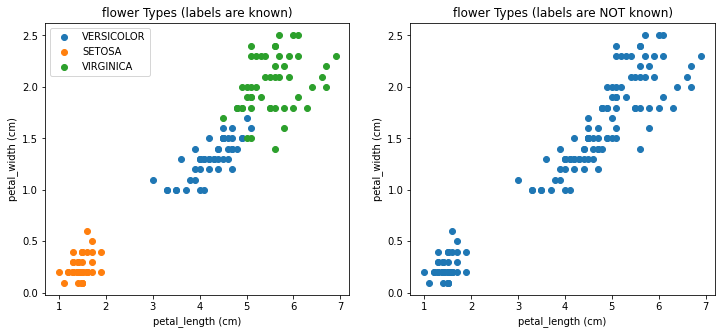

In [11]:
# List of suppported classes for the flower Iris
flower_types = [ 'VERSICOLOR', 'SETOSA','VIRGINICA']

# Flower parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

plt.figure(figsize=(12, 5))

# Plot the scatter for every type of flower.
plt.subplot(1, 2, 1)
for flower_type in flower_types:
    plt.scatter(
        iris_data[x_axis][iris_data['class'] == flower_type],
        iris_data[y_axis][iris_data['class'] == flower_type],
        label=flower_type
    )
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris flower Types (labels are known)')
plt.legend()

# Plot non-classified scatter of flowers.
plt.subplot(1, 2, 2)
plt.scatter(
    iris_data[x_axis][:],
    iris_data[y_axis][:],
)
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris flower Types (labels are NOT known)')

# Plot all subplots.
plt.show()


# Data Preparation

In [12]:
# Get total number of flower examples.
num_examples = iris_data.shape[0]

# Get features.
x_train = iris_data[[x_axis, y_axis]].values.reshape((num_examples, 2))

In [13]:
# Set K-Means parameters.
num_clusters = 3  
max_iterations = 50

# Initialize K-Means instance.
k_means = KMeans(x_train, num_clusters)

# Train K-Means instance.
(centroids, closest_centroids_ids) = k_means.train(max_iterations)

#Result of clustering

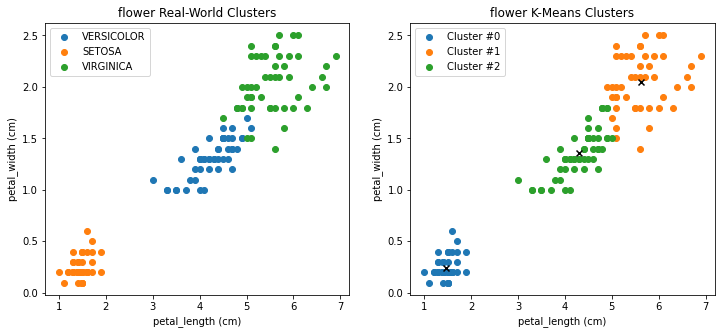

In [14]:
plt.figure(figsize=(12, 5))

# Plot ACTUAL flower classification.
plt.subplot(1, 2, 1)
for flower_type in flower_types:
    plt.scatter(
        iris_data[x_axis][iris_data['class'] == flower_type],
        iris_data[y_axis][iris_data['class'] == flower_type],
        label=flower_type
    )

plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Flower Real-World Clusters')
plt.legend()

# Plot UNSUPERWISED classification.
plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(
        iris_data[x_axis][current_examples_indices],
        iris_data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plot clusters centroids.
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Fower K-Means Clusters')
plt.legend()

# Show all subplots.
plt.show()